In [220]:
#importing all the necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np

In [221]:
#importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Assinment_1(SalesData)/sales_data.csv")

In [222]:
df.head() # taking an overview of the data

,Product,Region,Price,Units Sold,Sale Date
0,NaN,Region_6,75.96,10.0,2022-01-01
1,NaN,Region_1,175.78,8.0,2022-01-02
2,Product_46,Region_3,20.43,12.0,2022-01-03
3,Product_36,Region_1,12.77,10.0,2022-01-04
4,Product_17,Region_6,125.69,6.0,2022-01-05


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     947 non-null    object 
 1   Region      946 non-null    object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [224]:
top_products = df['Product'].value_counts().nlargest(5).index.tolist() # exracting top five most frequent products with count

def fill_missing_product(product):                          # function to fill in empty cells in products randomly with top five values 
    if pd.isnull(product):
        return np.random.choice(top_products)
    else:
        return product

df['Product'] = df['Product'].apply(fill_missing_product)


In [225]:
top_regions = df['Region'].value_counts().nlargest(5).index.tolist() # now extracting top 5 regions to fill in empty region cells

def fill_missing_region(region):    # function to fill in empty cells in regions randomly with top five values 
    if pd.isnull(region):
        return np.random.choice(top_regions)
    else:
        return region

df['Region'] = df['Region'].apply(fill_missing_region)

In [226]:
newdf1 = df.copy() # making a copy of the dataframe to avoid any error in the main dataset

In [227]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       945 non-null    float64
 3   Units Sold  946 non-null    float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [228]:
price_grouped_mean = newdf1.groupby('Product')['Price'].transform('mean')
newdf1['Price'].fillna(price_grouped_mean, inplace=True)
# filled Price column empty cells with mean value of corresponding Product 

In [229]:
units_sold_grouped_mean = newdf1.groupby('Region')['Units Sold'].transform('mean')
newdf1['Units Sold'].fillna(units_sold_grouped_mean, inplace=True)
# filled Units Sold column empty cells with mean value of corresponding Region

In [230]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1050 non-null   object 
 1   Region      1050 non-null   object 
 2   Price       1050 non-null   float64
 3   Units Sold  1050 non-null   float64
 4   Sale Date   1050 non-null   object 
dtypes: float64(2), object(3)
memory usage: 41.1+ KB


In [231]:
newdf2= newdf1.copy()
newdf1.drop_duplicates(inplace=True) # droping any possible duplicates

In [232]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1003 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     1003 non-null   object 
 1   Region      1003 non-null   object 
 2   Price       1003 non-null   float64
 3   Units Sold  1003 non-null   float64
 4   Sale Date   1003 non-null   object 
dtypes: float64(2), object(3)
memory usage: 47.0+ KB


Genrated a few graphs to see if we can predict something from the individual columns

C:\Users\supra\AppData\Local\Temp\ipykernel_25564\2260283868.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


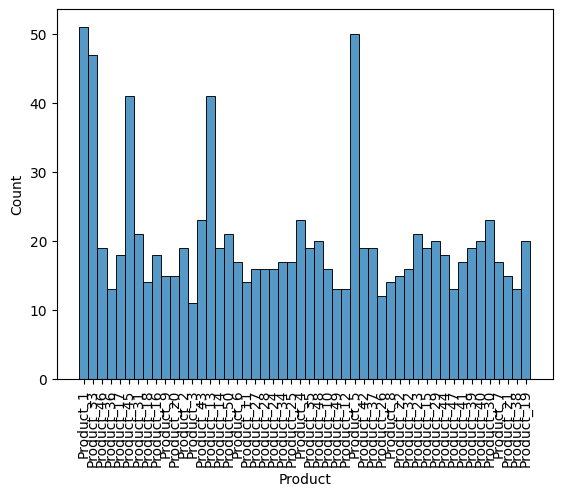

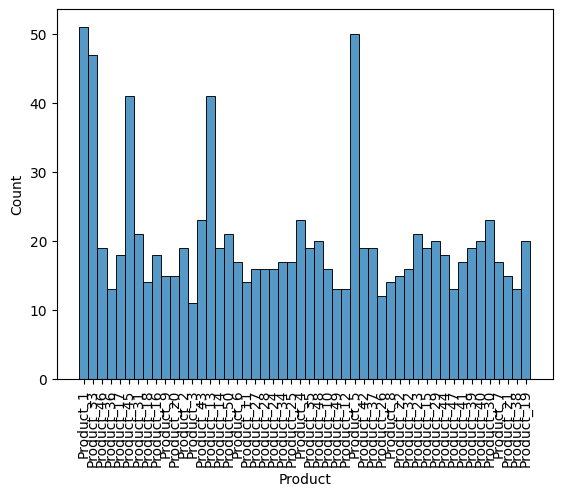

In [233]:
ax=sns.histplot(newdf1["Product"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure

The above graph shows the frequency of particular products in the dataset.

C:\Users\supra\AppData\Local\Temp\ipykernel_25564\4092988947.py:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


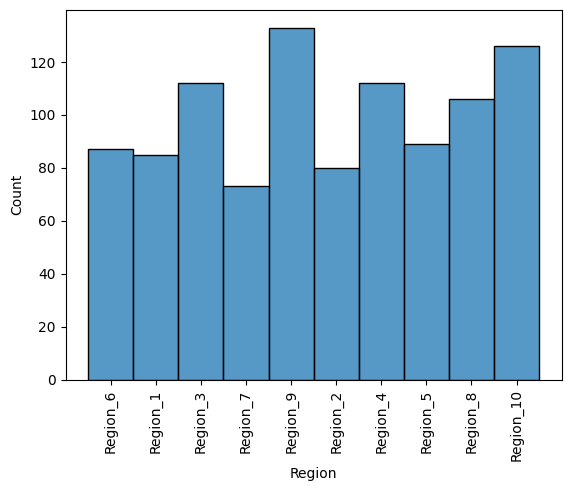

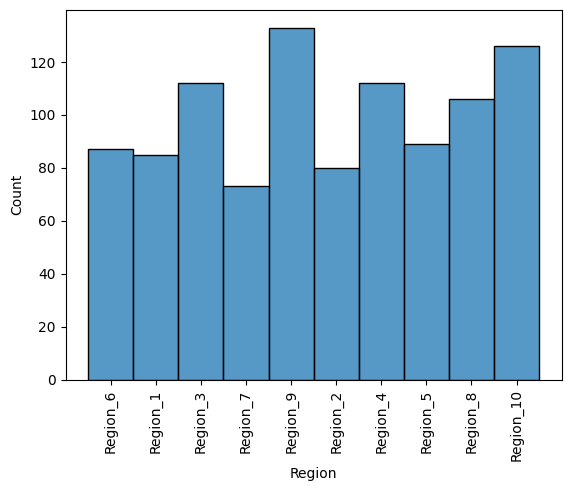

In [234]:
ax=sns.histplot(newdf1["Region"])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.figure

The above grapgh shows the frequency of a particular regions in the dataset.

<Axes: >

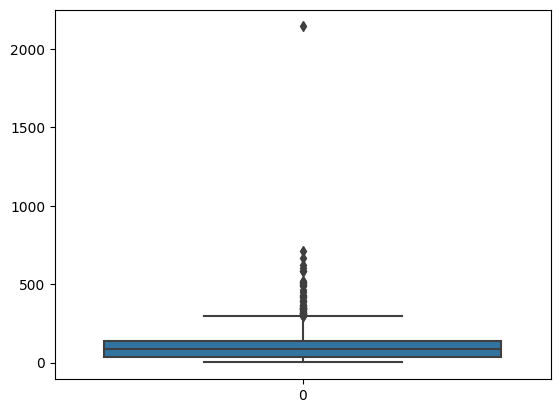

In [235]:
sns.boxplot(newdf1["Price"])

In [236]:
newdf1[newdf1['Price']>2000] 

,Product,Region,Price,Units Sold,Sale Date
969,Product_15,Region_8,2143.3,5.0,2024-08-27


we found one outlier so we will drop it

In [237]:
newdf1.drop(969,axis=0,inplace=True)

<Axes: >

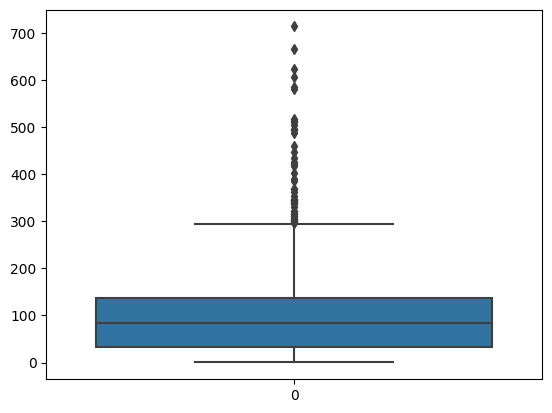

In [238]:
sns.boxplot(newdf1["Price"])

<Axes: >

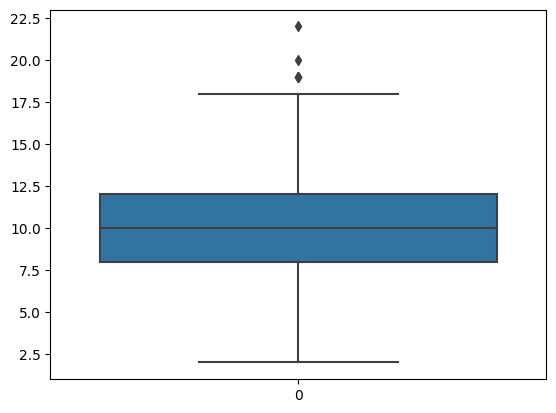

In [239]:
sns.boxplot(newdf1["Units Sold"])

In [240]:
newdf1[newdf1['Units Sold']>17.5] 

,Product,Region,Price,Units Sold,Sale Date
167,Product_28,Region_6,81.148750,18.0,2022-06-17
221,Product_5,Region_5,50.360000,20.0,2022-08-10
232,Product_14,Region_3,104.270000,19.0,2022-08-21
390,Product_41,Region_3,146.960000,18.0,2023-01-26
568,Product_42,Region_1,9.720000,18.0,2023-07-23
678,Product_9,Region_3,79.339286,18.0,2023-11-10
719,Product_50,Region_4,86.730000,22.0,2023-12-21
796,Product_16,Region_2,272.830000,18.0,2024-03-07
912,Product_22,Region_8,116.490000,19.0,2024-07-01
962,Product_13,Region_7,0.610000,19.0,2024-08-20


In [241]:
newdf1.drop(newdf1[newdf1['Units Sold']>17.5].index, axis = 0,inplace=True) 

even for units sold we can drop outliers (anything above 17.5)

In [242]:
newdf1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, 0 to 1048
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Product     992 non-null    object 
 1   Region      992 non-null    object 
 2   Price       992 non-null    float64
 3   Units Sold  992 non-null    float64
 4   Sale Date   992 non-null    object 
dtypes: float64(2), object(3)
memory usage: 46.5+ KB


<Axes: >

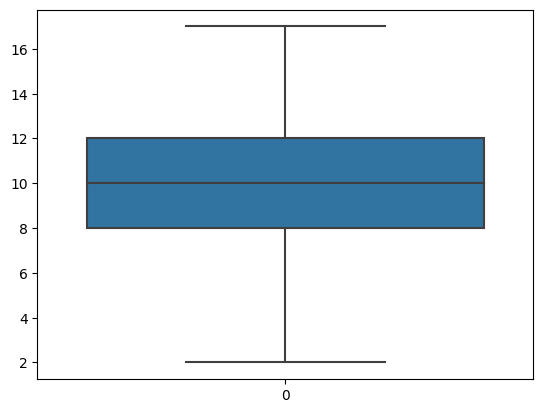

In [243]:
sns.boxplot(newdf1["Units Sold"])

In [244]:
newdf1['Sale Date'] = newdf1['Sale Date'].str[5:7] 

we can use the month from the dates to see if we can find any relation with any other columns

In [253]:
newdf1.iloc[170] #testing

Product       Product_38
Region          Region_8
Price              33.85
Units Sold       9.85567
Sale Date             06
Name: 171, dtype: object

In [246]:
#newdf1.to_csv('C:/Users/supra/OneDrive/Desktop/finalcopy.csv', index=False)
# was exporting the dataset to csv to analyse the dataset manually.


<Axes: xlabel='Sale Date', ylabel='Units Sold'>

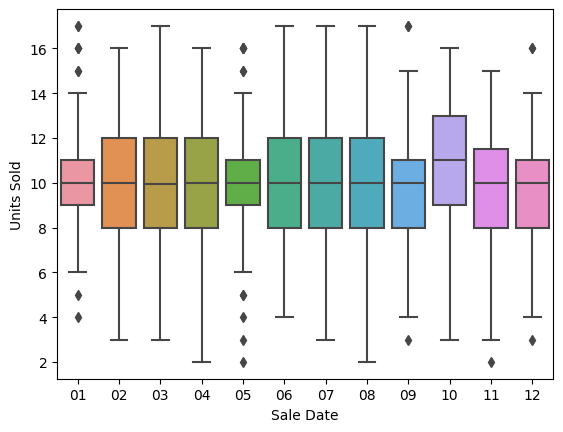

In [247]:
sns.boxplot(data = newdf1, y = 'Units Sold', x= 'Sale Date')

Based on this data, we can infer that, apart from January when sales are low and October when they are slightly higher, the number of units sold remains relatively consistent throughout the entire year.

In [248]:
newdf2.groupby('Region')['Units Sold'].sum().sort_values(ascending=False)


Region
Region_9     1408.935484
Region_10    1301.101695
Region_3     1205.364486
Region_4     1171.114286
Region_8     1103.835052
Region_5      948.952381
Region_6      940.941176
Region_1      872.900000
Region_2      830.307692
Region_7      766.235294
Name: Units Sold, dtype: float64


Based on this data, it is evident that regions 10, 9, and 3 are the top performers in terms of the number of units sold. We can create a chart to visually represent this information.

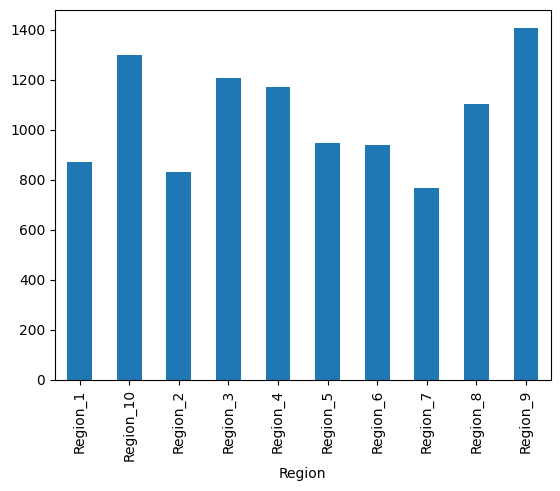

In [249]:
plot = newdf2.groupby('Region')['Units Sold'].sum().plot(kind='bar')

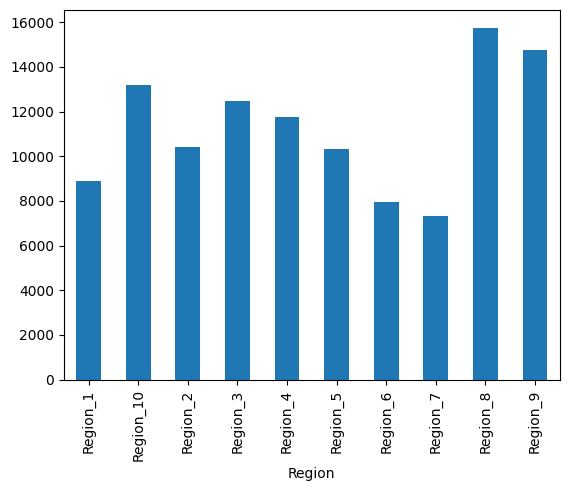

In [250]:
plot = newdf2.groupby('Region')['Price'].sum().plot(kind='bar')

The analysis of the last two graphs leads to the following conclusions:

1.Regions 10 and 9 demonstrate higher unit sales; however, their profitability appears to be comparatively lower.

2.Region 8 stands out as a top performer in both unit sales and overall profitability.

In [251]:
newdf1.groupby('Product')['Units Sold'].sum().sort_values(ascending=False)

Product
Product_1     492.224477
Product_33    468.708145
Product_5     442.061956
Product_13    399.217610
Product_45    377.880009
Product_30    246.867682
Product_43    245.117647
Product_4     243.095238
Product_50    218.950908
Product_48    218.000000
Product_23    215.918768
Product_31    209.000000
Product_2     201.017998
Product_19    200.000000
Product_15    197.019048
Product_29    196.222409
Product_7     187.419355
Product_46    187.209677
Product_35    186.150000
Product_40    183.973317
Product_37    183.209677
Product_14    182.918768
Product_10    179.209677
Product_17    177.095238
Product_34    174.214953
Product_44    173.102767
Product_27    171.973529
Product_21    168.165861
Product_16    167.000000
Product_39    163.126122
Product_42    163.083346
Product_24    163.070623
Product_25    160.009524
Product_41    158.000000
Product_11    153.230884
Product_20    153.094293
Product_8     152.864145
Product_28    148.214953
Product_6     148.015194
Product_9     145

In [252]:
newdf1.groupby('Product')['Price'].sum().sort_values(ascending=False)

Product
Product_1     5316.844884
Product_45    4663.857143
Product_5     4283.369167
Product_33    4061.318205
Product_13    3643.836000
Product_31    3047.510000
Product_40    3015.940000
Product_30    2861.660000
Product_29    2719.785455
Product_35    2624.018750
Product_2     2531.310625
Product_19    2474.800000
Product_41    2467.190000
Product_7     2368.008000
Product_26    2337.782500
Product_14    2319.537895
Product_50    2297.680000
Product_34    2275.705000
Product_23    2248.100952
Product_20    2146.166000
Product_39    2093.800000
Product_48    2079.040000
Product_15    2063.027500
Product_49    2016.090000
Product_4     1909.157368
Product_25    1874.250000
Product_46    1764.942353
Product_24    1753.070769
Product_17    1742.902632
Product_44    1728.377500
Product_22    1605.820000
Product_16    1597.786316
Product_37    1583.704000
Product_47    1462.619167
Product_32    1447.600000
Product_43    1447.022000
Product_42    1435.550625
Product_21    1375.930000
Prod


Based on the analysis of the last two "group by" operations, it can be inferred that Product 13 is generating the highest revenue and also has the highest sales volume. Therefore, it can be considered as the most desirable product based on its strong performance in terms of both revenue generation and popularity.

# Conclusion

## 1) What conclusions can you draw about sales performance of various products and regions?

The sales performance of various products and regions can be summarized as follows:

The number of units sold remains relatively consistent throughout the year, except for lower sales in January and slightly higher sales in October.

Regions 10, 9, and 3 stand out as top performers in terms of unit sales, with a visually represented chart showcasing their performance.

While regions 10 and 9 demonstrate higher unit sales, their profitability is comparatively lower.

Region 8 emerges as a top performer, excelling in both unit sales and overall profitability.

Product 13 stands out as the most desirable product, generating the highest revenue and having the highest sales volume.


## 2) What recommendations do you have for the business?

Concentrate on increasing profitability in regions 10 and 9: While some regions have larger unit sales, their profitability is lower. The company should look into the reasons for this and devise strategies.

Leverage the success of region 8: Region 8 has demonstrated exceptional performance in both unit sales and profitability. 

Profit from Product 13's popularity: Due to its high revenue creation and sales volume, Product 13 has proven to be a desirable product. The company should capitalise on its success by investing in marketing.

## 3) Describe your data cleaning approach. How and why did you decide on which cleaning techniques to use?

1)After reviewing the info() of the data, I identified empty cells in the Product and Region columns.

2)To address this, I filled in the empty cells with the top five most frequent values for each respective column.

3)Next, I utilized the Products field to calculate the mean price for each product.

4)I then filled the corresponding empty cells in the Price column with the mean value of the product's price.
Similarly, I repeated the process for the Regions and Units Sold columns.

5)The decision to use the Product column for calculating Price is based on the understanding that only a product can have a price, while unit sales can be influenced by various factors such as marketing efforts, inventory, and product demand in different regions.

6)To ensure data integrity, I removed any duplicate entries from the dataset.

7)Once the data preprocessing was completed, I proceeded with data visualization techniques.

8)Additionally, I identified and removed any outliers in the data to ensure accurate analysis and visual representation.


